In [150]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import linregress


In [128]:
#read file 
orig_file = pd.read_csv("police_fatal_shootings.csv")
clean_file = orig_file [["date", "armed", "threat_level","age", "gender", "race", "state", 
                         "signs_of_mental_illness", "flee", "body_camera"]]
clean_file = clean_file.rename(columns={"date":"Date", 
                                        "armed":"Armed", 
                                        "threat_level":"Threat",
                                        "age":"Age", 
                                        "gender":"Gender", 
                                        "race":"Race", 
                                        "state":"State",
                                        "signs_of_mental_illness": "Sign of Mental Illness", 
                                        "flee":"Flee", 
                                        "body_camera": "Body Camera"})

clean_file.head()

,Date,Armed,Threat,Age,Gender,Race,State,Sign of Mental Illness,Flee,Body Camera
0,12/21/2017,unarmed,other,6.0,M,W,TX,False,Not fleeing,False
1,1/6/2015,unarmed,other,34.0,F,W,IA,False,Not fleeing,True
2,1/11/2016,unarmed,other,12.0,F,W,PA,False,Not fleeing,False
3,9/14/2016,toy weapon,other,13.0,M,B,OH,False,Foot,False
4,1/7/2015,gun,attack,37.0,M,B,LA,False,Foot,True


In [129]:
#total rows
clean_file.count()

Date                      4377
Armed                     4130
Threat                    4377
Age                       4191
Gender                    4372
Race                      3856
State                     4377
Sign of Mental Illness    4377
Flee                      4203
Body Camera               4377
dtype: int64

In [130]:
#clean for 2015-2018, change date column to datetime 
clean_file['Date'] = pd.to_datetime(clean_file['Date'])  
# clean_file.head()
mask = (clean_file['Date'] > '2015-01-01') & (clean_file['Date'] <= '2018-12-31')
clean_date = clean_file.loc[mask]
clean_date.head()

,Date,Armed,Threat,Age,Gender,Race,State,Sign of Mental Illness,Flee,Body Camera
0,2017-12-21,unarmed,other,6.0,M,W,TX,False,Not fleeing,False
1,2015-01-06,unarmed,other,34.0,F,W,IA,False,Not fleeing,True
2,2016-01-11,unarmed,other,12.0,F,W,PA,False,Not fleeing,False
3,2016-09-14,toy weapon,other,13.0,M,B,OH,False,Foot,False
4,2015-01-07,gun,attack,37.0,M,B,LA,False,Foot,True


In [131]:
#2015-2018 count
clean_date.count()

Date                      3934
Armed                     3689
Threat                    3934
Age                       3801
Gender                    3931
Race                      3656
State                     3934
Sign of Mental Illness    3934
Flee                      3800
Body Camera               3934
dtype: int64

In [132]:
#drop empty rows, reset index
df = clean_date.dropna(how ="any")
df.reset_index()
df.count()

Date                      3272
Armed                     3272
Threat                    3272
Age                       3272
Gender                    3272
Race                      3272
State                     3272
Sign of Mental Illness    3272
Flee                      3272
Body Camera               3272
dtype: int64

In [133]:
#bin by year
df["Date"].head()
cut_points = pd.to_datetime([np.datetime64('2015-01-01'), np.datetime64('2015-12-31'), np.datetime64('2016-12-31'), np.datetime64('2017-12-31'), np.datetime64('2018-12-31')])
group_names = ["2015", "2016", "2017", "2018"]
df["Year"] = pd.cut(df['Date'], cut_points, labels=group_names)
df.head()

/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,Date,Armed,Threat,Age,Gender,Race,State,Sign of Mental Illness,Flee,Body Camera,Year
0,2017-12-21,unarmed,other,6.0,M,W,TX,False,Not fleeing,False,2017
1,2015-01-06,unarmed,other,34.0,F,W,IA,False,Not fleeing,True,2015
2,2016-01-11,unarmed,other,12.0,F,W,PA,False,Not fleeing,False,2016
3,2016-09-14,toy weapon,other,13.0,M,B,OH,False,Foot,False,2016
4,2015-01-07,gun,attack,37.0,M,B,LA,False,Foot,True,2015


In [134]:
#group by year
year_group = df.groupby("Year")
year_group.head()

,Date,Armed,Threat,Age,Gender,Race,State,Sign of Mental Illness,Flee,Body Camera,Year
0,2017-12-21,unarmed,other,6.0,M,W,TX,False,Not fleeing,False,2017
1,2015-01-06,unarmed,other,34.0,F,W,IA,False,Not fleeing,True,2015
2,2016-01-11,unarmed,other,12.0,F,W,PA,False,Not fleeing,False,2016
3,2016-09-14,toy weapon,other,13.0,M,B,OH,False,Foot,False,2016
4,2015-01-07,gun,attack,37.0,M,B,LA,False,Foot,True,2015
5,2017-11-08,knife,other,14.0,M,N,WI,False,Not fleeing,False,2017
6,2015-01-08,shovel,attack,42.0,M,W,UT,False,Not fleeing,True,2015
7,2015-06-14,gun,attack,15.0,M,W,FL,True,Not fleeing,False,2015
9,2015-10-15,gun,attack,15.0,M,H,FL,False,Car,False,2015
10,2016-04-19,gun,attack,15.0,M,B,MO,False,Other,False,2016


In [135]:
#create df for 2015
group_2015 = year_group.get_group('2015')
group_2015_df = pd.DataFrame(group_2015)
# group_2015_df.head()

#create df for 2016
group_2016 = year_group.get_group('2016')
group_2016_df = pd.DataFrame(group_2016)
# group_2016_df.head()

#create df for 2017
group_2017 = year_group.get_group('2017')
group_2017_df = pd.DataFrame(group_2017)
# group_2017_df.head()

#create df for 2018
group_2018 = year_group.get_group('2018')
group_2018_df = pd.DataFrame(group_2018)
# group_2018_df


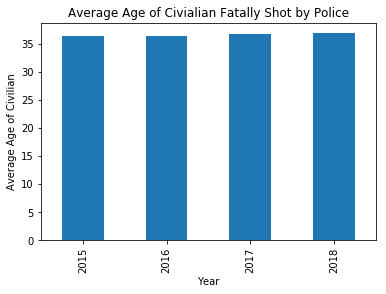

In [136]:
#average age for each year
year_group_age_avg = year_group["Age"].mean()
avg_age_chart = year_group_age_avg.plot(kind="bar", title="Average Age of Civialian Fatally Shot by Police")
avg_age_chart.set_ylabel("Average Age of Civilian")
plt.show()

In [137]:
#body cam use by year
year_group_body_cam = year_group["Body Camera"].value_counts()
year_group_body_cam = pd.DataFrame({"Counts": year_group_body_cam})
year_group_body_cam

Counts
Year Body Camera        
2015 False           824
     True             71
2016 False           686
     True            128
2017 False           698
     True             85
2018 False           686
     True             94

In [138]:
#Calculate percentage with body cameras
bc_2015= 824/(824+71) * 100
bc_2016= 686/(686+128) * 100
bc_2017= 698/(698+85) * 100
bc_2018= 686/(686+94) * 100

#plot table of body cam use over time


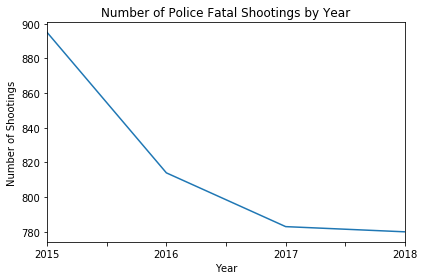

In [139]:
#number of fatalities in each year
year_count = year_group["Year"].count()
count_chart = year_count.plot(title="Number of Police Fatal Shootings by Year")
count_chart.set_ylabel("Number of Shootings")
plt.tight_layout()
plt.show()

In [140]:
age = year_group['Age'].value_counts()
age_table = pd.DataFrame({"Counts": age})
age_table.head()

Counts
Year Age         
2015 27.0      34
     31.0      34
     28.0      33
     35.0      33
     29.0      32

In [141]:
gender = year_group['Gender'].value_counts()
gender_summary_table = pd.DataFrame({"Counts": gender})
gender_summary_table

Counts
Year Gender        
2015 M          860
     F           35
2016 M          780
     F           34
2017 M          749
     F           34
2018 M          740
     F           40

Text(0, 0.5, 'Gender')

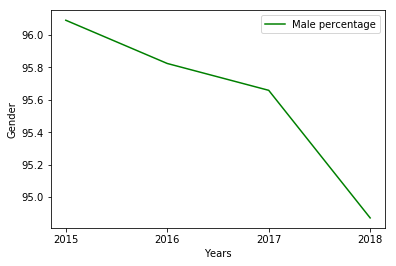

In [142]:
gender_2015 = (860/(860+35)) * 100
gender_2016 = (780/(780+34)) * 100
gender_2017 = (749/(749+34)) * 100
gender_2018 = (740/(740+40)) * 100

years = ["2015","2016","2017","2018"]
male_percent = [gender_2015,gender_2016,gender_2017,gender_2018]
plt.plot(years, male_percent, color="green", label="Male percentage")
plt.legend(loc="best")
plt.xlabel("Years")
plt.ylabel("Gender")





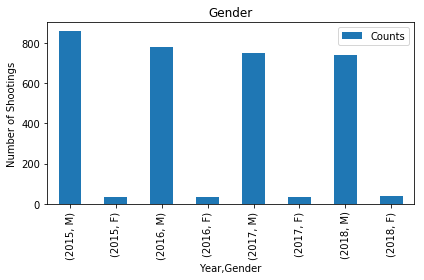

In [143]:
gender_chart = gender_summary_table.plot(kind="bar", title="Gender")
gender_chart.set_ylabel("Number of Shootings")
plt.tight_layout()
plt.show()

In [144]:
mental_health = year_group['Sign of Mental Illness'].value_counts()
mh_summary_table = pd.DataFrame({"Counts": mental_health})
mh_summary_table


Counts
Year Sign of Mental Illness        
2015 False                      656
     True                       239
2016 False                      595
     True                       219
2017 False                      575
     True                       208
2018 False                      608
     True                       172

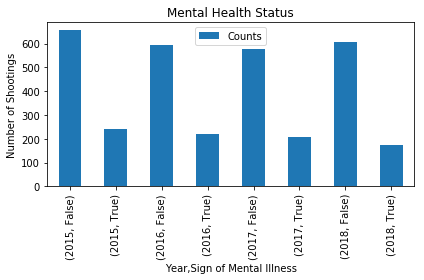

In [145]:
mental_health_chart = mh_summary_table.plot(kind="bar", title="Mental Health Status")
mental_health_chart.set_ylabel("Number of Shootings")
plt.tight_layout()
plt.show()

In [146]:
race = year_group['Race'].value_counts()
race_table = pd.DataFrame({"Counts": race})
race_table

Counts
Year Race        
2015 W        469
     B        231
     H        160
     O         15
     A         12
     N          8
2016 W        424
     B        212
     H        141
     A         14
     N         14
     O          9
2017 W        405
     B        190
     H        151
     N         19
     A         13
     O          5
2018 W        404
     B        201
     H        137
     A         20
     N         15
     O          3

In [152]:
print(type(race_table['Counts']))

<class 'pandas.core.series.Series'>


In [151]:
#line regression of race over years
year = ["2015", "2016", "2017", "2018"]
race = race_table['Counts']
(slope, intercept, _, _, _) = linregress(year, race)
fit = slope * year + intercept

fig, ax = plt.subplots()
fig.suptitle("Race", fontsize=16, fontweight="bold")
ax.set_ylim(0, 500)

ax.plot(year, race, linewidth=1, marker='o')
ax.plot(year, r_fit, 'b--')
plt.show()


TypeError: cannot perform reduce with flexible type

In [121]:
threat = df.groupby(['Year',"Sign of Mental Illness", "Threat"]) 
threat =threat["State"].count()
threat_df = pd.DataFrame(threat)
threat_df

State
Year Sign of Mental Illness Threat             
2015 False                  attack          514
                            other           114
                            undetermined     28
     True                   attack          162
                            other            69
                            undetermined      8
2016 False                  attack          353
                            other           203
                            undetermined     39
     True                   attack          120
                            other            95
                            undetermined      4
2017 False                  attack          374
                            other           175
                            undetermined     26
     True                   attack          121
                            other            85
                            undetermined      2
2018 False                  attack          389
                            other           197
                            undetermined     22
     True                   attack          102
                            other            64
                            undetermined      6

In [ ]:
body_cam = df.groupby(['Year', 'Flee', "Threat", "Body Camera"]) 
body_cam_count = body_cam["State"].count()

# body_cam_table = pd.DataFrame({"Body Camera Count": body_cam_count})
# # body_cam_table.head()
# # list(body_cam_table.columns.values)
# body_cam_2015 = body_cam_table.loc[body_cam_table['Year']]
# body_cam_2015.head()



In [ ]:
print(body_cam_table.index)

In [ ]:
#breakdown by season using DatetimeIndex.dayofyear
df['Season'] = pd.cut(
    (df.loc[df['Date']].dt.dayofyear + 11) % 366,
    [0, 91, 183, 275, 366],
    labels=['Winter', 'Spring', 'Summer', 'Fall']
)